In [64]:
# Import Statements

import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import os
import os.path as path
from os.path import dirname as up
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from pathlib import Path   
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
pd.set_option('display.max_columns', None)

In [65]:
# Absolute Paths
master_folder = up(up(os.path.abspath(os.getcwd()))) + "\\"
production_pipeline = "production_pipeline\\"
data_folder = "data\\"
code_folder = "code\\"
raw_data_folder = "raw_data\\"
processed_input_data = "processed_input_data\\"
temp_folder = "temp_input_data\\"
store_prd = "StoreProduct.csv"
raw_data = "ExpressTop50.csv"

In [66]:
def get_one_file_data(prd_id,store_id,start_date):
    # prd_id = str(p)
    # store_id = str(s)
    
    data = pd.read_csv(master_folder+production_pipeline+data_folder+raw_data_folder + raw_data,chunksize=1000000)
    l = []
    for i in data:
        i['day_dt'] = pd.to_datetime(i['day_dt'])
        i = i.loc[i["day_dt"]>start_date]
        i = i.loc[(i["p_id"]==prd_id) & (i["ut_id"]==store_id)]
        l.append(i)
    
    data = pd.concat(l, ignore_index=True)
    data["p_id"] = data["p_id"].astype(str)
    data["ut_id"] = data["ut_id"].astype(str)
    
    #Cleaning and pre-processing data

    data.rename(
        {
            'ut_id': 'store_id', 
            'p_id': 'prd_id',
            'mkt_bskt_ut_qt':'quantity'
        }, axis=1, inplace=True)
    
    data = data.drop_duplicates(subset = ["day_dt","store_id","prd_id"])

    if not os.path.exists(master_folder+production_pipeline+data_folder+temp_folder):
        os.makedirs(master_folder+production_pipeline+data_folder+temp_folder)

    
    print(master_folder+production_pipeline+data_folder+temp_folder+"store_"+str(store_id)+"_prd_"+str(prd_id)+".csv")

    return (data)

In [6]:
prd = 538252
store = 158 
x = get_one_file_data(prd,store,"2020-07-12")
display(x)

c:\Personal Lavanya\Purdue\MSBAIM\IP\production_pipeline\data\temp_input_data\store_158_prd_538252.csv


,day_dt,wk_end_dt,store_id,prd_id,mjr_mds_are_id,mjr_p_cls_id,p_sell_dur,quantity,p_bse_pr_am,p_promo_pr_am,atl_p_sold_am,ntl_log_mkt_bskt_ut_qt,ntl_log_bse_pr_am,ntl_log_bse_dct_pr_am,ntl_log_bse_promo_dct_pr_am,ut_same_sto_flg,atl_min_temp_val,atl_mean_temp_val,atl_max_temp_val,atl_t_ppt_qt,atl_t_snow_qt,day_bef_ppt_temp_val,day_bef_snow_temp_val,day_aft_ppt_temp_val,day_aft_snow_temp_val,sunprexmas,redsat,blackfri,turkey,saturdayb4turkey,fridayb4turkey,veterans,halloweenfri,halloween,halloweeneve,prehalo_sun,prehalo_fri,columbus,laborfri,laborsun,laborsat,laborwkend,labor,dad,dadsat,memwkend,mom,momsat,easterwk,easter,eastersat,presday,valentinewknd,valentine,dayb4valentine,superbowlsat,superbowl,mlk,ny,julyfour,halloweenwkend,dectwothree,xmaseve,satpny,sunpny,memorial,prehalo_sat,turkeywed,dectwosix,mcc_blk_out,nyeve,fcl_per_of_yr_id,fcl_wk_of_yr_id,fcl_yr_id,cldr_day_of_wk_id,augdow1,augdow2,augdow3,augdow4,augdow5,augdow6,augdow7,julydow1,julydow2,julydow3,julydow4,julydow5,julydow6,julydow7,dow1,dow2,dow3,dow4,dow5,dow6,dow7,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21,wk22,wk23,wk24,wk25,wk26,wk27,wk28,wk29,wk30,wk31,wk32,wk33,wk34,wk35,wk36,wk37,wk38,wk39,wk40,wk41,wk42,wk43,wk44,wk45,wk46,wk47,wk48,wk49,wk50,wk51,wk52,HomeLocationCapacityQuantity
0,2023-01-07,2023-01-07,158,538252,L6-000003,L2-014980,1916,32,1.89,1.89,1.89,3.496508,0.636577,0.0,0.0,Y,28.9,30.5,32.0,0.00,0.0,0.09,-999.99,0.14,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,49,2022,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2023-01-06,2023-01-07,158,538252,L6-000003,L2-014980,1916,47,1.89,1.89,1.89,3.871201,0.636577,0.0,0.0,Y,31.0,33.0,35.0,0.14,0.6,0.00,0.00,0.09,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,49,2022,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2023-01-05,2023-01-07,158,538252,L6-000003,L2-014980,1915,70,1.89,1.89,1.89,4.262680,0.636577,0.0,0.0,Y,33.0,34.5,36.0,0.09,0.0,0.14,0.60,0.09,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,49,2022,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2023-01-04,2023-01-07,158,538252,L6-000003,L2-014980,1914,42,1.89,1.89,1.89,3.761200,0.636577,0.0,0.0,Y,33.9,38.5,43.0,0.09,0.0,0.09,0.00,0.33,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,49,2022,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2023-01-03,2023-01-07,158,538252,L6-000003,L2-014980,1913,53,1.89,1.89,1.89,3.988984,0.636577,0.0,0.0,Y,36.0,38.0,40.0,0.33,0.0,0.09,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,49,2022,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2020-07-17,2020-07-18,158,538252,L6-000003,L2-014980,10

In [67]:
perf_df = pd.DataFrame(columns ={"Store","Product","RMSE","MAPE"})

In [68]:
perf_df

,Product,RMSE,Store,MAPE


In [69]:

def timeseries_evaluation_metrics_func(y_true, y_pred, store_id, prd_id):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        return mape
    
    
    diffs = y_true - y_pred
    sum_diff = np.sum(diffs)
    sum_act = np.sum(y_true)
    wmape = sum_diff/sum_act
    mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

    pdf = {"Store" : store_id,"Product": prd_id,"RMSE": rmse,"MAPE": mape}
    perf_df = perf_df.append(pdf, ignore_index = True)

    # print('Evaluation metric results:-')
    # print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    # print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    # print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    # print(f'MAPE is : {metrics.mean_absolute_percentage_error(y_true, y_pred)}')
    # print(f'WMAPE is : {wmape}')
    # print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')




In [70]:
def holt_winters(df,store_id,p_id):
    # Set the frequency of the date time index as weekly start as indicated by the data
    # Set the value of Alpha and define m (Time Period)
    m = 7
    alpha = 1/(2*m)
    # Creating dataframe with only date and sales columns
    df_pred = pd.DataFrame(df, columns=['quantity','day_dt','wk_end_dt'])
    # Test and train split (80-20)

    # Dataset consists of day_dt, wk_end_dt and mkt_bskt_ut_qt columns
    # Converting date columns to datetime format
    df_pred['day_dt'] = pd.to_datetime(df_pred['day_dt']) - pd.to_timedelta(0, unit='d')
    df_pred['wk_end_dt'] = pd.to_datetime(df_pred['wk_end_dt']) - pd.to_timedelta(0, unit='d')
    # Aggregate to weekly level following a Saturday to Friday schedule
    df_pred = df_pred.groupby([pd.Grouper(key='wk_end_dt', freq='W-SAT')])['quantity'].sum().reset_index()

    split = int(len(df_pred)*0.8)
    train = df_pred[:split]
    train = train.set_index('wk_end_dt')
    test = df_pred[split:]
    test = test.set_index('wk_end_dt')

    # display(test_weekly.head())
    # Holt-Winters' Model
    fitted_model = ExponentialSmoothing(train['quantity'],trend='add',seasonal='add',seasonal_periods=12).fit()
    test_predictions = fitted_model.forecast(len(test))
    # train['quantity'].plot(legend=True,label='TRAIN')
    # test['quantity'].plot(legend=True,label='TEST',figsize=(6,4))
    # test_predictions.plot(legend=True,label='PREDICTION')
    # plt.title('Train, Test and Predicted Test using Holt Winters')
    # Error Metrics
    # print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
    # print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test,test_predictions)}')
    # print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')
    timeseries_evaluation_metrics_func(test.to_numpy(),test_predictions.to_numpy(),store_id,p_id)

   

In [10]:
holt_winters(x)

Evaluation metric results:-
RMSE is : 67.3252511357435
MAPE is : 0.1736325024513255
WMAPE is : -0.824129511662882


c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


In [71]:
def lstm(df,store_id,p_id):
    df['day_dt'] = pd.to_datetime(df['day_dt'])
    df = df.drop(['store_id','ut_same_sto_flg','prd_id','wk_end_dt','mjr_mds_are_id','mjr_mds_are_id','mjr_mds_are_id','mjr_mds_are_id','mjr_p_cls_id'],axis = 1)
    df2_date = df['day_dt']

    split = int(len(df)* 0.8)    
    df2_train = df.iloc[0:split,1:]
    df2_test = df.iloc[split:,1:]
    sc = StandardScaler()
    df2_train_scaled = sc.fit_transform(df2_train)
    print('Train Scaled Shape: ',df2_train_scaled.shape)
    sc2 = StandardScaler()
    df2_train_scaled_y = sc2.fit_transform(df2_train[['quantity']])
    print('Test Scaled Shape: ',df2_train_scaled_y.shape)
    hops=14    
    no_records = split    
    no_cols = df2_train_scaled.shape[1]
    X_train = []
    y_train = []
    for i in range(14,split):
        X_train.append(df2_train_scaled[i-14:i])
        y_train.append(df2_train_scaled_y[i][0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train_shape = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    model = Sequential()
    model.add(LSTM(units=50,return_sequences=True, input_shape=(14,df2_train_scaled.shape[1])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss ='mean_squared_error')
    model.fit(X_train_shape,y_train,epochs = 90, batch_size = 100)
    df1_train_last14 = df2_train.iloc[-14:]
    df1_test_full = df2_test    
    full_df = pd.concat((df1_train_last14, df1_test_full),axis=0)
    full_df = sc.transform(full_df)
    no_records = full_df.shape[0]
    no_cols = full_df.shape[1]
    X_train_shape_pred = []
    for i in range(hops,no_records):
        X_train_shape_pred.append(full_df[i-14:i])
    X_train_shape_pred = np.array(X_train_shape_pred)
    ytest = model.predict(X_train_shape_pred)
    y_final_pred = sc2.inverse_transform(ytest)
    final_open_pred = pd.DataFrame(y_final_pred)
    final_open_pred.columns = ['final_open_pred']
    final_open_pred.index += split
    fully_final = pd.concat((final_open_pred,df2_test),axis = 1)
    fully_final = fully_final[['quantity','final_open_pred', 'atl_max_temp_val', 'atl_mean_temp_val', 
       'atl_min_temp_val', 'atl_p_sold_am', 'atl_t_ppt_qt', 'atl_t_snow_qt',
       'blackfri', 'cldr_day_of_wk_id', 'columbus', 'dad', 'dadsat',
       'day_aft_ppt_temp_val', 'day_aft_snow_temp_val', 'day_bef_ppt_temp_val',
       'day_bef_snow_temp_val', 'dayb4valentine', 'dectwosix', 'dectwothree',
       'easter', 'eastersat', 'easterwk', 'fridayb4turkey', 'halloween',
       'halloweeneve', 'halloweenfri', 'halloweenwkend',
       'HomeLocationCapacityQuantity', 'labor', 'laborfri', 'laborsat',
       'laborsun', 'laborwkend', 'mcc_blk_out', 'memorial', 'memwkend',
        'mlk', 'mom', 'momsat', 'ny', 'nyeve',
       'p_promo_pr_am', 'p_sell_dur', 'prehalo_fri', 'prehalo_sat',
       'prehalo_sun', 'presday', 'redsat', 'satpny', 'saturdayb4turkey',
       'sunpny', 'sunprexmas', 'superbowl', 'superbowlsat', 'turkey',
       'valentine', 'valentinewknd', 'veterans', 'xmaseve']]
    fully_final['final_open_pred'] = fully_final['final_open_pred'].mask(fully_final['final_open_pred'] < 0, 0)
    plt.plot(df['quantity'], label = 'actual', color = 'red')
    plt.plot(fully_final['final_open_pred'], label = 'predicted', color = 'blue')
    plt.legend()
    Y_actual = fully_final['quantity'] 
    Y_Predicted = fully_final['final_open_pred']   
    return timeseries_evaluation_metrics_func(Y_actual.to_numpy(),Y_Predicted.to_numpy(),store_id,p_id)

Train Scaled Shape:  (727, 142)
Test Scaled Shape:  (727, 1)
Epoch 1/90
8/8 [==============================] - 3s 24ms/step - loss: 0.8997
Epoch 2/90
8/8 [==============================] - 0s 19ms/step - loss: 0.7371
Epoch 3/90
8/8 [==============================] - 0s 23ms/step - loss: 0.6861
Epoch 4/90
8/8 [==============================] - 0s 25ms/step - loss: 0.6426
Epoch 5/90
8/8 [==============================] - 0s 20ms/step - loss: 0.6311
Epoch 6/90
8/8 [==============================] - 0s 20ms/step - loss: 0.6003
Epoch 7/90
8/8 [==============================] - 0s 19ms/step - loss: 0.5726
Epoch 8/90
8/8 [==============================] - 0s 19ms/step - loss: 0.5540
Epoch 9/90
8/8 [==============================] - 0s 19ms/step - loss: 0.5086
Epoch 10/90
8/8 [==============================] - 0s 20ms/step - loss: 0.4601
Epoch 11/90
8/8 [==============================] - 0s 19ms/step - loss: 0.4237
Epoch 12/90
8/8 [==============================] - 0s 19ms/step - loss: 0.3788


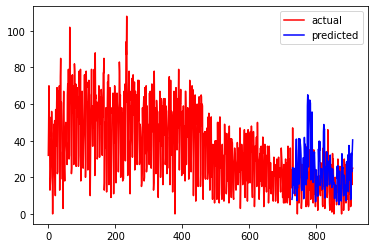

In [20]:
lstm(x)

In [72]:
# input is file filtered by store and product, set with weekly index but containing all columns.
def arima_week(df,store_id,p_id):    
    #columns of interest
    cols = ['quantity','atl_p_sold_am', 'atl_mean_temp_val','wk_end_dt'] 
    df_sel = df[cols]
    
    #weekly aggregation
    week = df_sel.groupby('wk_end_dt').aggregate({'quantity':'sum', 'atl_p_sold_am': 'mean', 'atl_mean_temp_val': 'mean'})
    
    #post covid data filter
    el_df = week[week.index.get_level_values(0) > '2020-07-12']
    
    #data partition
    split = int(len(el_df)*0.8)
    train = el_df[:split]
    test = el_df[split:]
    # train, test = model_selection.train_test_split(el_df, train_size=0.8)

    # Fit a simple auto_arima model
    arima = pm.auto_arima(train['quantity'], error_action='ignore', trace=False,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)
    
    preds, conf_int = arima.predict(n_periods=test.shape[0], return_conf_int=True)
    # Plot actual test vs. forecasts:
    # plt.plot(test.index, test['quantity'], marker='o', label = 'Actual Test Samples')
    # plt.plot(test.index, arima.predict(n_periods=test.shape[0]), color='green', label= 'Forecast Test Samples')
    # plt.title('Actual test samples vs. forecasts')
    # plt.rcParams['figure.figsize'] = [10, 10]
    # plt.legend()
    # plt.show()
    
    #return RMSE, MAPE, WMAPE
    return timeseries_evaluation_metrics_func(test['quantity'].to_numpy(),preds.to_numpy(),store_id,p_id)

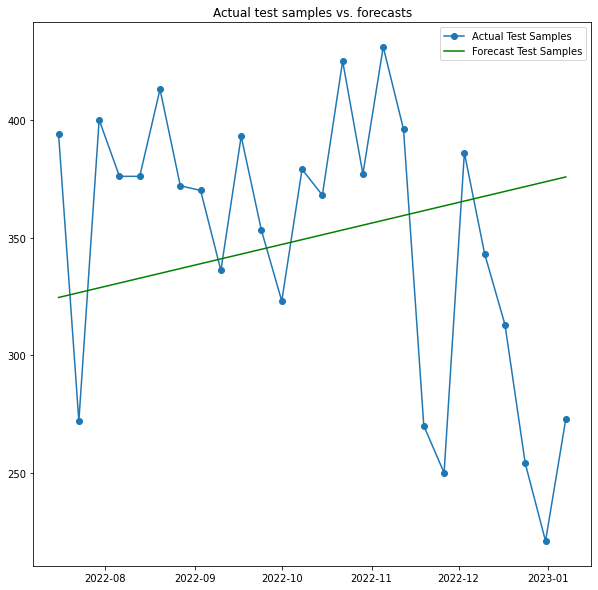

Evaluation metric results:-
MSE is : 4425.873010064224
MAE is : 55.608272555872425
RMSE is : 66.52723510010185
MAPE is : 0.1785166166552608
WMAPE is : -0.004352075147006915
R2 is : -0.329487877222004



In [100]:
arim_week(x)

In [73]:
exo = ['p_sell_dur',
 'p_bse_pr_am',
 'p_promo_pr_am',
 'atl_p_sold_am',
 'atl_mean_temp_val',
 'atl_t_ppt_qt',
 'atl_t_snow_qt',
 'day_bef_ppt_temp_val',
 'day_bef_snow_temp_val',
 'day_aft_ppt_temp_val',
 'day_aft_snow_temp_val',
 'sunprexmas',
 'redsat',
 'blackfri',
 'turkey',
 'saturdayb4turkey',
 'fridayb4turkey',
 'veterans',
 'halloweenfri',
 'halloween',
 'halloweeneve',
 'prehalo_sun',
 'prehalo_fri',
 'columbus',
 'laborfri',
 'laborsun',
 'laborsat',
 'laborwkend',
 'labor',
 'dad',
 'dadsat',
 'memwkend',
 'mom',
 'momsat',
 'easterwk',
 'easter',
 'eastersat',
 'presday',
 'valentinewknd',
 'valentine',
 'dayb4valentine',
 'superbowlsat',
 'superbowl',
 'mlk',
 'ny',
 'julyfour',
 'halloweenwkend',
 'dectwothree',
 'xmaseve',
 'satpny',
 'sunpny',
 'memorial',
 'prehalo_sat',
 'turkeywed',
 'dectwosix',
 'mcc_blk_out',
 'nyeve',
 'cldr_day_of_wk_id']
#  'dow1',
#  'dow2',
#  'dow3',
#  'dow4',
#  'dow5',
#  'dow6',
#  'dow7',
#  'wk1',
#  'wk2',
#  'wk3',
#  'wk4',
#  'wk5',
#  'wk6',
#  'wk7',
#  'wk8',
#  'wk9',
#  'wk10',
#  'wk11',
#  'wk12',
#  'wk13',
#  'wk14',
#  'wk15',
#  'wk16',
#  'wk17',
#  'wk18',
#  'wk19',
#  'wk20',
#  'wk21',
#  'wk22',
#  'wk23',
#  'wk24',
#  'wk25',
#  'wk26',
#  'wk27',
#  'wk28',
#  'wk29',
#  'wk30',
#  'wk31',
#  'wk32',
#  'wk33',
#  'wk34',
#  'wk35',
#  'wk36',
#  'wk37',
#  'wk38',
#  'wk39',
#  'wk40',
#  'wk41',
#  'wk42',
#  'wk43',
#  'wk44',
#  'wk45',
#  'wk46',
#  'wk47',
#  'wk48',
#  'wk49',
#  'wk50',
#  'wk51',
#  'wk52',
#  'HomeLocationCapacityQuantity']

In [74]:
def sarimax(df,store_id,p_id):
    data3 = df
    data3 = data3.reset_index(level=0)
    data3.set_index('day_dt',inplace = True)

    train_no = int(0.8 * len(data3))
    # Create Training and Test
    train = data3[:train_no]
    test = data3[train_no:]

    exog_forecast =  exo

    model = SARIMAX(train['quantity'],exog=train[exog_forecast],order=(0,0,0),seasonal_order=(1,0,[1],7),enforce_invertibility=False)
    results = model.fit()
    # results.summary()

    start = len(train)
    end = len(train) + len(test) - 1

    predictions =  results.predict(start=start,end=len(df)-1,exog=test[exog_forecast]).rename('SARIMAX(0,0,0)(1,0,[1],7) Predictions')
    display(predictions)
    test['prediction']= predictions.tolist()
    # print(predictions)
    # display(test)

    # f = plt.figure()
    # f.set_figwidth(20)
    # f.set_figheight(7)
    # plt.plot(test['prediction'], color='green',label='Predicted')
    # plt.plot(test["quantity"], color='yellow', label='Actual')
    # plt.xticks(rotation=90)
    # # spacing = 1
    # # plt.subplots_adjust(bottom=spacing)
    # # plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    # plt.legend(loc='best')

    # test.index += train_no    
    # plt.plot(data3.index, data3['quantity'], marker='o', label = 'Actual Test Samples')
    # plt.plot(test.index, test['prediction'], color='green', label= 'Forecast Test Samples')
    
   
    # plt.title('Actual test samples vs. forecasts')
    # plt.rcParams['figure.figsize'] = [10, 10]
    # plt.legend()
    # plt.show()

    return timeseries_evaluation_metrics_func(test["quantity"].to_numpy(),predictions.to_numpy(),store_id,p_id)


In [22]:
sarimax(x)

NameError: name 'exo' is not defined

In [237]:
prd = [538252]
store = 158 
# x = get_one_file_data(prd,store,"2020-07-12")
# display(x)

for i in prd:
    x = get_one_file_data(i,store,"2020-07-12")
    print(i)
    print("SARIMA.................")
    sarimax(x)    
    print("Holt-Winters...........")
    holt_winters(x)
    print("ARIMAX.................")
    arim_week(x)


c:\Personal Lavanya\Purdue\MSBAIM\IP\production_pipeline\data\temp_input_data\store_158_prd_538252.csv
538252
SARIMA.................


c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Use

727     9.086209
728    12.565848
729    26.465884
730    16.946223
731    19.713438
         ...    
904     8.810734
905     1.399243
906     3.218752
907     1.700907
908     3.996032
Name: SARIMAX(0,0,0)(1,0,[1],7) Predictions, Length: 182, dtype: float64

C:\Users\lavan\AppData\Local\Temp\ipykernel_17940\2963821492.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']= predictions.tolist()
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


Evaluation metric results:-
RMSE is : 14.206487613303148
MAPE is : 931659447959323.8
WMAPE is : 0.5806117380721507
Holt-Winters...........
Evaluation metric results:-
RMSE is : 67.3252511357435
MAPE is : 0.1736325024513255
WMAPE is : -0.824129511662882
ARIMAX.................
Evaluation metric results:-
RMSE is : 66.52723510010185
MAPE is : 0.1785166166552608
WMAPE is : -0.004352075147006915


In [75]:
def xgboost(df,store_id,p_id):
        import xgboost as xgb
        from xgboost import plot_importance, plot_tree
        from sklearn.metrics import mean_squared_error, mean_absolute_error

        # df = x
        split = int(len(df)*0.8)
        train = df[:split]
        test = df[split:]
        train.set_index('day_dt',inplace = True)
        test.set_index('day_dt',inplace = True)

        X_train = train[exo]
        y_train = train[['quantity']]
        X_test = test[exo]
        y_test = test[['quantity']]

        reg = xgb.XGBRegressor(n_estimators=1000, 
                        learning_rate=0.03,
                        max_depth=12,
                        subsample=0.9,
                        colsample_bytree=0.7,
                        random_state=1111,
                        tree_method='gpu_hist')
        reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                early_stopping_rounds=50,
        verbose=False)

        # plt.rcParams["figure.figsize"] = (14, 10)
        # _ = plot_importance(reg, height=3)
        y_pred = reg.predict(X_test)

        # plt.plot(y_test.index, y_test, label = 'actual', color = 'red')
        # plt.plot(y_pred.index, y_pred, label = 'predicted', color = 'blue')
        # plt.legend()
        # _ = data_all[['number','number_Prediction']].plot(figsize=(15, 5))
        timeseries_evaluation_metrics_func(y_test.to_numpy(),y_pred,store_id,p_id)

In [55]:
print("XGBoost")
xgboost(x)
print("Sarimax")
sarimax(x)
print("Arima")
arima_week(x)
print("holt winters")
holt_winters(x)
print("lstm")
lstm(x)

XGBoost


c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Evaluation metric results:-
RMSE is : 6.929957499102251
MAPE is : 1400289178661179.5
WMAPE is : 1.942652424781135
Sarimax


c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Use

727     9.086209
728    12.565848
729    26.465884
730    16.946223
731    19.713438
         ...    
904     8.810734
905     1.399243
906     3.218752
907     1.700907
908     3.996032
Name: SARIMAX(0,0,0)(1,0,[1],7) Predictions, Length: 182, dtype: float64

C:\Users\lavan\AppData\Local\Temp\ipykernel_23356\2963821492.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']= predictions.tolist()


Evaluation metric results:-
RMSE is : 14.206487613303148
MAPE is : 931659447959323.8
WMAPE is : 0.5806117380721507
Arima
Evaluation metric results:-
RMSE is : 66.52723510010185
MAPE is : 0.1785166166552608
WMAPE is : -0.004352075147006915
holt winters
Evaluation metric results:-
RMSE is : 67.3252511357435
MAPE is : 0.1736325024513255
WMAPE is : -0.824129511662882


c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


lstm
Train Scaled Shape:  (727, 142)
Test Scaled Shape:  (727, 1)
Epoch 1/90
8/8 [==============================] - 4s 21ms/step - loss: 0.9064
Epoch 2/90
8/8 [==============================] - 0s 19ms/step - loss: 0.7187
Epoch 3/90
8/8 [==============================] - 0s 19ms/step - loss: 0.6567
Epoch 4/90
8/8 [==============================] - 0s 18ms/step - loss: 0.6169
Epoch 5/90
8/8 [==============================] - 0s 17ms/step - loss: 0.6032
Epoch 6/90
8/8 [==============================] - 0s 20ms/step - loss: 0.5746
Epoch 7/90
8/8 [==============================] - 0s 26ms/step - loss: 0.5527
Epoch 8/90
8/8 [==============================] - 0s 32ms/step - loss: 0.5284
Epoch 9/90
8/8 [==============================] - 0s 29ms/step - loss: 0.4976
Epoch 10/90
8/8 [==============================] - 0s 31ms/step - loss: 0.4723
Epoch 11/90
8/8 [==============================] - 0s 31ms/step - loss: 0.4396
Epoch 12/90
8/8 [==============================] - 0s 28ms/step - loss: 0.

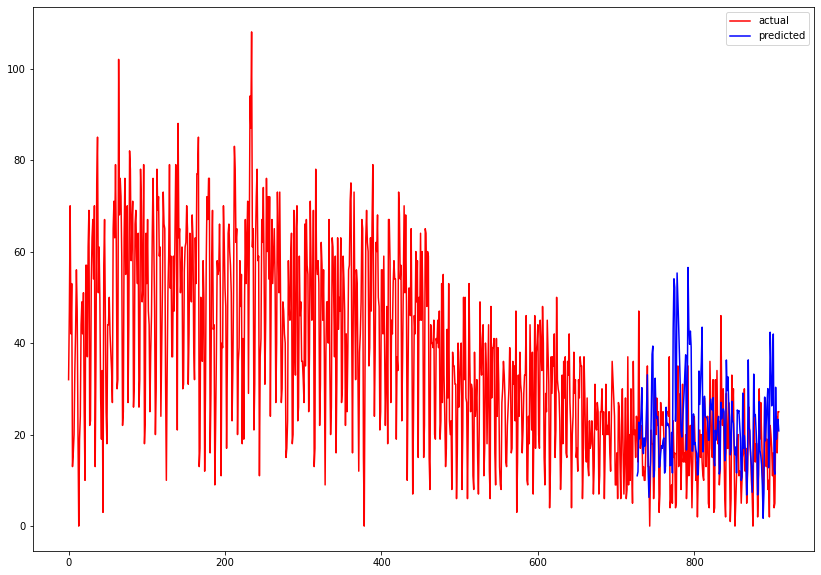

In [77]:
def get_all_file_data(start_date):
    str_prd = pd.read_csv(master_folder+production_pipeline+data_folder+raw_data_folder+store_prd)
    str_prd = str_prd[["p_id","ut_id"]]
    str_prd = str_prd.drop_duplicates()
    data = pd.read_csv(master_folder+production_pipeline+data_folder+raw_data_folder + raw_data,chunksize=1000000)
    
    for index, row in str_prd.iterrows():
        
        l = []
        for i in data:
            if index == 0:
                i['day_dt'] = pd.to_datetime(i['day_dt'])
            i = i.loc[i["day_dt"]>start_date]
            i = i.loc[(i["p_id"]==row['p_id']) & (i["ut_id"]==row['ut_id'])]
            l.append(i)
        
        data = pd.concat(l, ignore_index=True)
        
        # Cleaning and pre-processing data

        data.rename(
            {
                'ut_id': 'store_id', 
                'p_id': 'prd_id',
                'mkt_bskt_ut_qt':'quantity'
            }, axis=1, inplace=True)
        
        data = data.drop_duplicates(subset = ["day_dt","store_id","prd_id"])


        xgboost(data,row['ut_id'],row['p_id'])
        sarimax(data,row['ut_id'],row['p_id'])
        arima_week(data,row['ut_id'],row['p_id'])
        holt_winters(data,row['ut_id'],row['p_id'])
        lstm(data,row['ut_id'],row['p_id'])

        print("Done processing: Store - " + row['ut_id'] + " Product - " + row['p_id'])

        
        

In [78]:
get_all_file_data("2020-07-12")

c:\Users\lavan\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


UnboundLocalError: local variable 'perf_df' referenced before assignment

In [ ]:
# def lstm(df):
#     df['day_dt'] = pd.to_datetime(df['day_dt'])
#     df = df.drop(['store_id','ut_same_sto_flg','prd_id','wk_end_dt','mjr_mds_are_id','mjr_mds_are_id','mjr_mds_are_id','mjr_mds_are_id','mjr_p_cls_id'],axis = 1)
#     df2_date = df['day_dt']

#     split = int(len(df)* 0.8)    
#     df2_train = df.iloc[0:split,1:]
#     df2_test = df.iloc[split:,1:]
#     sc = StandardScaler()
#     df2_train_scaled = sc.fit_transform(df2_train)
#     print('Train Scaled Shape: ',df2_train_scaled.shape)
#     sc2 = StandardScaler()
#     df2_train_scaled_y = sc2.fit_transform(df2_train[['quantity']])
#     print('Test Scaled Shape: ',df2_train_scaled_y.shape)
#     hops=14    
#     no_records = split    
#     no_cols = df2_train_scaled.shape[1]
#     X_train = []
#     y_train = []
#     for i in range(14,split):
#         X_train.append(df2_train_scaled[i-14:i])
#         y_train.append(df2_train_scaled_y[i][0])
#     X_train, y_train = np.array(X_train), np.array(y_train)
#     X_train_shape = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
#     model = Sequential()
#     model.add(LSTM(units=50,return_sequences=True, input_shape=(14,df2_train_scaled.shape[1])))
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(optimizer = 'adam', loss ='mean_squared_error')
#     model.fit(X_train_shape,y_train,epochs = 10, batch_size = 100)
#     df1_train_last14 = df2_train.iloc[-14:]
#     df1_test_full = df2_test    
#     full_df = pd.concat((df1_train_last14, df1_test_full),axis=0)
#     full_df = sc.transform(full_df)
#     no_records = full_df.shape[0]
#     no_cols = full_df.shape[1]
#     X_train_shape_pred = []
#     for i in range(hops,no_records):
#         X_train_shape_pred.append(full_df[i-14:i])
#     X_train_shape_pred = np.array(X_train_shape_pred)
#     ytest = model.predict(X_train_shape_pred)
#     y_final_pred = sc2.inverse_transform(ytest)
#     final_open_pred = pd.DataFrame(y_final_pred)
#     final_open_pred.columns = ['final_open_pred']
#     final_open_pred.index += split
#     fully_final = pd.concat((final_open_pred,df2_test),axis = 1)
#     fully_final = fully_final[['quantity','final_open_pred', 'atl_max_temp_val', 'atl_mean_temp_val', 
#        'atl_min_temp_val', 'atl_p_sold_am', 'atl_t_ppt_qt', 'atl_t_snow_qt',
#        'blackfri', 'cldr_day_of_wk_id', 'columbus', 'dad', 'dadsat',
#        'day_aft_ppt_temp_val', 'day_aft_snow_temp_val', 'day_bef_ppt_temp_val',
#        'day_bef_snow_temp_val', 'dayb4valentine', 'dectwosix', 'dectwothree',
#        'easter', 'eastersat', 'easterwk', 'fridayb4turkey', 'halloween',
#        'halloweeneve', 'halloweenfri', 'halloweenwkend',
#        'HomeLocationCapacityQuantity', 'labor', 'laborfri', 'laborsat',
#        'laborsun', 'laborwkend', 'mcc_blk_out', 'memorial', 'memwkend',
#         'mlk', 'mom', 'momsat', 'ny', 'nyeve',
#        'p_promo_pr_am', 'p_sell_dur', 'prehalo_fri', 'prehalo_sat',
#        'prehalo_sun', 'presday', 'redsat', 'satpny', 'saturdayb4turkey',
#        'sunpny', 'sunprexmas', 'superbowl', 'superbowlsat', 'turkey',
#        'valentine', 'valentinewknd', 'veterans', 'xmaseve']]
#     fully_final['final_open_pred'] = fully_final['final_open_pred'].mask(fully_final['final_open_pred'] < 0, 0)
#     plt.plot(df['quantity'], label = 'actual', color = 'red')
#     plt.plot(fully_final['final_open_pred'], label = 'predicted', color = 'blue')
#     plt.legend()
#     Y_actual = fully_final['quantity'] 
#     Y_Predicted = fully_final['final_open_pred']   
#     return timeseries_evaluation_metrics_func(Y_actual.to_numpy(),Y_Predicted.to_numpy())